#### **(1) 데이터 불러오기**

In [ ]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [ ]:
import pandas as pd 
review = pd.read_csv('review_6910.csv', index_col=0)
review['날짜'] = review['날짜'].apply(lambda x : str(x)[:10])
review #6851

,날짜,리뷰,응답날짜,응답,별점,유저명,공감수
0,2019-12-28,앱 알림설정에서 알림 카테고리를 '무음 및 최소화'로 두는데 자꾸 팝업알림으로 알림...,2019-12-30 09:41:27,안녕하세요 회원님. 먼저 앱 이용에 불편을 드려 죄송합니다. 회원님의 말씀하신 사...,1,Google 사용자,25
1,2022-07-01,1. 검색 히스토리 뜨면 좋겠어요. 2. 검색어 자동 추천 있으면 좋겠어요. 3. ...,2022-07-04 01:03:17,안녕하세요. 회원님께서 전해 주신 의견은 앞으로 포켓CU 업그레이드 과정에 반영할 ...,3,김태은,31
2,2022-06-29,좋은 점 1.출첵으로 약간의 포인트 획득 2. 번호 없이 포인트 적립 가능 나쁜 점...,2022-06-30 02:45:12,"안녕하세요. 회원님, 포켓CU를 이용해 주셔서 먼저 감사드립니다. 점포교육을 시행하...",1,none the less,30
3,2022-07-01,첫 화면 배너가 손으로 하나하나 넘기다가 갑자기 다시 앞으로 휘리릭 돌아가요. 이게...,2022-07-04 01:00:40,안녕하세요. 회원님께서 전해 주신 의견은 앞으로 포켓CU 업그레이드 과정에 반영할 ...,2,이세영,14
4,2022-05-21,예전에 비해 많이 개선된 모습이 반갑습니다만 여전히 아쉬운 점도 보입니다 특히 키핑...,2022-05-23 01:24:33,안녕하세요. 회원님 앱 이용에 불편을 드려 죄송합니다. 메인 > 하단 QR > 키핑...,2,댕댕,60
...,...,...,...,...,...,...,...
6905,2022-03-12,😓,2022-03-14 09:12:55,"안녕하세요. 회원님, 항상 포켓 CU를 이용해 주셔서 감사합니다. 어떤 점이 불편한...",1,이성구,0
6906,2022-04-10,😡😡😡😡,2022-04-13 01:16:09,"안녕하세요. 회원님, 항상 포켓 CU를 이용해 주셔서 감사합니다. 앱이용에 어떤 점...",1,최윤호,0
6907,2014-03-25,good,NaN,NaN,4,Google 사용자,0
6908,2014-10-10,good,NaN,NaN,5,Google 사용자,0


#### **(2) 전처리**

In [ ]:
review['날짜']  = pd.to_datetime(review['날짜'])
review['연도'] = review['날짜'].dt.year
review['월'] = review['날짜'].dt.month 
review['요일'] = review['날짜'].dt.dayofweek

한글 출력을 위한 패키지 임포트

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 88.7 kB in 6s (15.8 kB/s)
Reading package lists...
Reading pack

In [ ]:
# JAVA_HOME 환경변수 설정하기

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
from konlpy.tag import Okt
import re
okt=Okt()

PORORO 리뷰 분석기 

* https://dacon.io/codeshare/4462

In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/kakaobrain/pororo.git

fatal: destination path 'pororo' already exists and is not an empty directory.


In [ ]:
ls

pororo/  review_6910.csv  sample_data/


In [ ]:
cd pororo

/content/pororo


In [ ]:
!pip install -e . 

# 실행 후 런타임 재시작 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/pororo
  Preparing metadata (setup.py) ... done
  Attempting uninstall: pororo
    Found existing installation: pororo 0.4.1
    Can't uninstall 'pororo'. No files were found to uninstall.
  Running setup.py develop for pororo


In [ ]:
!pwd

/content/pororo


In [ ]:
cd ..

/content


In [ ]:
from pororo import Pororo

review_p = Pororo(task='review', lang='ko') 

In [ ]:
review['리뷰'][1]

'1. 검색 히스토리 뜨면 좋겠어요. 2. 검색어 자동 추천 있으면 좋겠어요. 3. 제품 재고 확인이 번거롭습니다. 재고 확인하려면 단골점포만 볼 수 있는데 3지점밖에 추가가 안돼서 너무 불편해요. 그리고 지도에서 제품 재고 있는 점포 찾을 때 점포가 아예 안떠요. 점포들 위치는 뜨고 점포마다 수량 있는지 없는지 표시가 돼야 하는 거 아닌가요?'

In [ ]:
review_p(review['리뷰'][1])

2.73

In [ ]:
review['리뷰'][5]

'앱이 너무 느려서 답답해요. 과자 한 봉지 사려고 장바구니나 구매 버튼 누른 뒤에 2분이 넘도록 화면 정지예요. 와이파이/데이터 상관 없이 캐시 삭제 완전 종료 이런 거 해도 소용 없어요. 이벤트로 받은 쿠폰 쓰려고 하는데 쓰지 못하게 되었네요😊 문의 남겼고 남긴 문의 확인하려고 해도 무한로딩이 시작됩니다... 창이 바뀌질 않으니 뭘 볼 수가 없어서 안타깝네요.'

In [ ]:
review_p(review['리뷰'][5])

1.62

In [ ]:
review['리뷰'][256]

'좀더 편리하고 간단하게 만들필요 있을것 같아요.'

In [ ]:
review_p(review['리뷰'][256])

3.54

In [ ]:
review['score'] = review['리뷰'].apply(lambda x : review_p(str(x)))

In [ ]:
(review['별점'] - review['score']) 

0      -0.24
1       0.27
2      -0.30
3       0.04
4      -1.06
        ... 
6905   -3.02
6906   -3.02
6907   -0.47
6908    0.53
6909   -2.22
Length: 6910, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f780ea8acd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f780ea9bd50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f780eaa2d90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f780eaa2850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f780ea9b2d0>,
  <matplotlib.lines.Line2D at 0x7f780ea9b810>]}

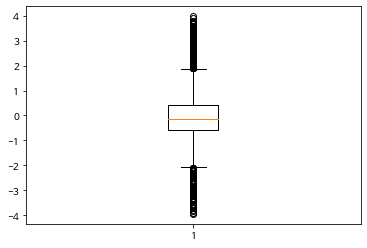

In [ ]:
plt.boxplot(review['별점'] - review['score'])

In [ ]:
#감정분석
sa_shop = Pororo(task='sentiment', model='brainbert.base.ko.shopping', lang='ko') 

In [ ]:
sa_shop(review['리뷰'][1])

'Negative'

In [ ]:
sa_shop(review['리뷰'][5])

'Negative'

In [ ]:
review['sentiment'] = review['리뷰'].apply(lambda x : sa_shop(str(x)))

In [ ]:
stopwords = ['하다','하고','있다','언제','은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','을','에서','거','좀','요']


In [ ]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = True, stop_words =stopwords):

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 명사 단어로 나눔 
  word_review = okt.nouns(review_text)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [ ]:
review['token'] = review['리뷰'].apply(lambda x : preprocessing(str(x), okt))

* 기존 playstore 리뷰 분포 
  * 3점이하는 부정으로 분류 

In [ ]:
# sentiment 
review['sentiment_s'] = 3
for i in range(len(review)) : 
  if review['별점'][i] <= 3 : 
    review['sentiment_s'][i] = 0 # 부정 
  
  else : 
    review['sentiment_s'][i] = 1 # 긍정 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


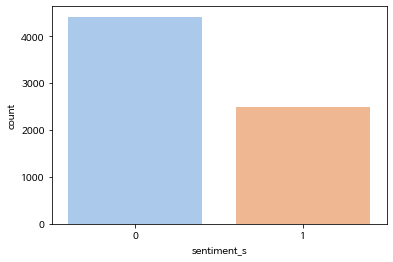

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
ax = sns.countplot(x='sentiment_s',data=review, palette='pastel') # 부정 리뷰가 2배 더 많음 

* PORORO 리뷰 분석기, 감정분석 결과


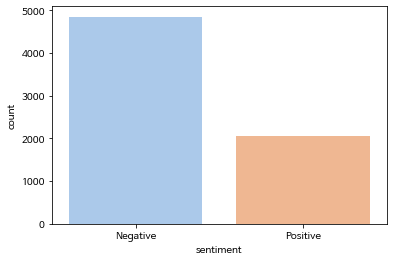

In [ ]:
plt.rc('font', family='NanumBarunGothic')
ax = sns.countplot(x='sentiment',data=review, palette='pastel')

#### **(3) 워드클라우드**

In [ ]:
words = [] 

for i in review['token'] : 
  for j in i : 
    words.append(j)



In [ ]:
remove_one_word = [x for x in words if len(x)>1]

In [ ]:
from collections import Counter
frequent = Counter(remove_one_word).most_common()

{'업데이트': 1030, '적립': 686, '사용': 647, '포인트': 629, '어플': 629, '로그인': 623, '바코드': 520, '가입': 476, '쿠폰': 467, '이벤트': 452, '계속': 446, '다시': 427, '삭제': 375, '결제': 371, '재고': 369, '회원': 362, '할인': 343, '카드': 340, '설치': 325, '오류': 320, '상품': 296, '확인': 287, '편의점': 280, '등록': 279, '화면': 256, '진짜': 251, '인증': 251, '해도': 242, '실행': 226, '포켓몬빵': 226, '기능': 217, '이용': 212, '씨유': 211, '구매': 195, '그냥': 194, '당첨': 193, '포켓': 192, '하라': 188, '번호': 187, '하나': 187, '접속': 183, '자꾸': 172, '로딩': 167, '매장': 163, '점포': 161, '비번': 161, '검색': 155, '단골': 155, '아이디': 152, '시간': 149}




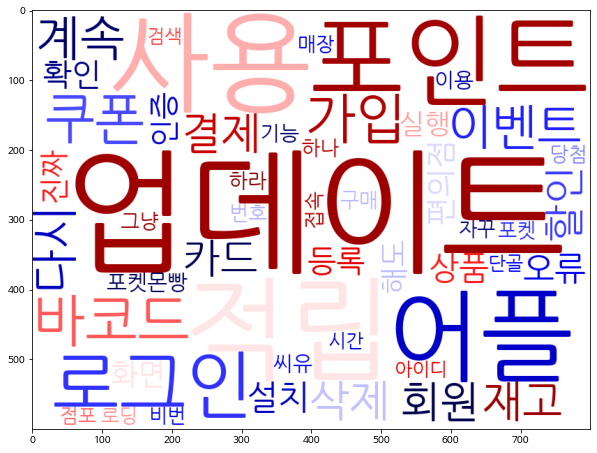

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords




words = Counter(remove_one_word).most_common(50)



from wordcloud import WordCloud


wordcloud = WordCloud(font_path=r"/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
                      background_color='white',
                      colormap = 'seismic',
                      width=800,
                      height=600)

print(dict(words))
print('\n')

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10,15))
plt.imshow(cloud)



In [ ]:
positive = review[review['sentiment']=='Positive']
negative = review[review['sentiment']=='Negative']

🔹 긍정 리뷰 워드클라우드 

In [ ]:
words = [] 

for i in positive['token'] : 
  for j in i : 
    words.append(j)

remove_one_word = [x for x in words if len(x)>1]
frequent = Counter(remove_one_word).most_common()

{'이벤트': 274, '사용': 136, '포인트': 129, '적립': 128, '당첨': 128, '할인': 109, '쿠폰': 92, '씨유': 85, '편의점': 78, '이용': 78, '어플': 73, '자주': 69, '최고': 60, '정말': 60, '아주': 59, '혜택': 56, '바코드': 50, '상품': 49, '결제': 49, '포켓': 46, '포켓몬빵': 42, '기능': 41, '카드': 37, '한번': 32, '완전': 29, '업데이트': 27, '행사': 27, '재고': 26, '단골': 25, '참여': 25, '확인': 24, '구매': 24, '항상': 24, '매우': 23, '진짜': 23, '추천': 19, '정보': 18, '점포': 17, '사랑': 17, '재미': 16, '쓰기': 16, '매장': 15, '등록': 15, '서비스': 15, '통신사': 15, '기분': 15, '이번': 15, '대박': 15, '처음': 14, '제품': 14}




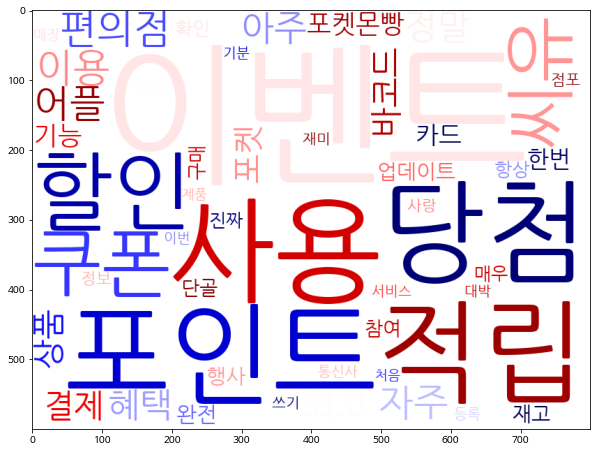

In [ ]:
words = Counter(remove_one_word).most_common(50)



from wordcloud import WordCloud


wordcloud = WordCloud(font_path=r"/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
                      background_color='white',
                      colormap = 'seismic',
                      width=800,
                      height=600)

print(dict(words))
print('\n')

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10,15))
plt.imshow(cloud)

In [ ]:
positive['리뷰'][41]

🔹 부정 리뷰 워드클라우드 

In [43]:
words = [] 

for i in negative['token'] : 
  for j in i : 
    words.append(j)

remove_one_word = [x for x in words if len(x)>1]
frequent = Counter(remove_one_word).most_common()

{'업데이트': 1003, '로그인': 614, '적립': 558, '어플': 556, '사용': 511, '포인트': 500, '바코드': 470, '가입': 470, '계속': 436, '다시': 421, '쿠폰': 375, '삭제': 371, '회원': 362, '재고': 343, '결제': 322, '설치': 317, '오류': 313, '카드': 303, '등록': 264, '확인': 263, '화면': 253, '인증': 250, '상품': 247, '해도': 238, '할인': 234, '진짜': 228, '실행': 225, '편의점': 202, '그냥': 189, '하라': 187, '번호': 185, '포켓몬빵': 184, '하나': 181, '이벤트': 178, '기능': 176, '접속': 173, '구매': 171, '자꾸': 169, '로딩': 164, '비번': 160, '아이디': 151, '매장': 148, '검색': 147, '포켓': 146, '점포': 144, '비밀번호': 142, '시간': 139, '입력': 138, '업뎃': 137, '이용': 134}




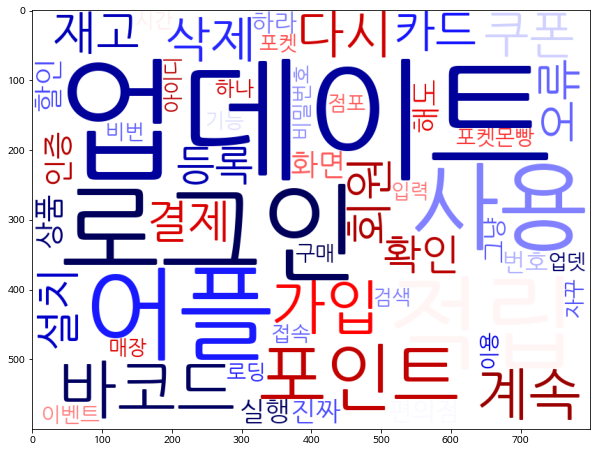

In [44]:
words = Counter(remove_one_word).most_common(50)



from wordcloud import WordCloud


wordcloud = WordCloud(font_path=r"/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
                      background_color='white',
                      colormap = 'seismic',
                      width=800,
                      height=600)

print(dict(words))
print('\n')

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10,15))
plt.imshow(cloud)

#### **(4) 토픽모델링**

In [45]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [46]:
processed_data=[]
for i in range(len(review)):
  if len(review['token'][i]) > 0 : 
    processed_data.append(review['token'][i])

In [47]:
dictionary = corpora.Dictionary(processed_data)

In [48]:
dictionary.filter_extremes(no_above=0.5)

# 전체의 50%로 이상 차지하는 단어는 제외

In [49]:
corpus = [dictionary.doc2bow(text) for text in processed_data]

**🔹 최적의 토픽 갯수 찾기**

* Coherence : 토픽이 얼마나 의미론적으로 일관성 있는지 판단
* 값이 높을수록 의미론적 일관성이 높음 

In [50]:
pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 37.5 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [51]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=116df0e9bdfcaac7ce3f6a9abf0ab3ac2ac0b8dbabd144051b74173c71fc792d
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [52]:
from gensim.models.coherencemodel import CoherenceModel
import pickle
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [64]:
coherence_values = [] 
for i in range(2,10) : 
  ldamodel = LdaModel(corpus, num_topics=i, id2word = dictionary) 
  coherence_model_lda = CoherenceModel(model = ldamodel, texts = processed_data, dictionary = dictionary)
  coherence_lda = coherence_model_lda.get_coherence()
  coherence_values.append(coherence_lda)

[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  self.update_eta(self.state.get_lambda(), rho)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  self.update_eta(self.state.get_lambda(), rho)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sel

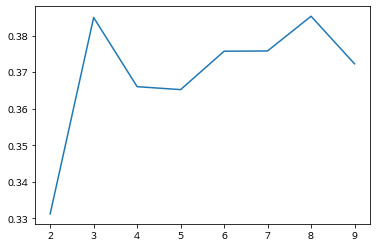

In [65]:
import matplotlib.pyplot as plt
x = range(2,10)
plt.plot(x,coherence_values) 
plt.show()

In [55]:
num_topics = 3
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

[Korean Sentence Splitter]: updated prior not positive


In [56]:
top_topics = model.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)


Average topic coherence: -3.8919.
[([(0.047568865, '업데이트'),
   (0.03701623, '적립'),
   (0.03451787, '앱'),
   (0.03023188, '포인트'),
   (0.02710437, '사용'),
   (0.024279436, '바코드'),
   (0.019316927, '굿'),
   (0.017038155, '설치'),
   (0.015498259, '삭제'),
   (0.015159127, '결제'),
   (0.01503283, '할인'),
   (0.01502296, '다시'),
   (0.013683495, '씨유'),
   (0.013508195, '어플'),
   (0.013457193, '쿠폰'),
   (0.011878131, '왜'),
   (0.0108279325, '후'),
   (0.010482099, '카드'),
   (0.010332726, '실행'),
   (0.009908922, '때')],
  -3.4106330481302254),
 ([(0.05446363, '가입'),
   (0.05372021, '로그인'),
   (0.039649434, '회원'),
   (0.036125354, '왜'),
   (0.028166765, '앱'),
   (0.024654653, '다운'),
   (0.021186555, '인증'),
   (0.018845748, '당첨'),
   (0.018257696, '오류'),
   (0.018000638, '계속'),
   (0.016216828, '번호'),
   (0.0153149795, '카드'),
   (0.014573261, '아이디'),
   (0.013145007, '비밀번호'),
   (0.012578407, '확인'),
   (0.011863368, '비번'),
   (0.011288177, '뭐'),
   (0.011095302, '입력'),
   (0.010363976, '자꾸'),
   (0.00992

In [57]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.075702 -0.185645       1        1  43.528014
1     -0.150765  0.148705       2        1  34.696329
2      0.226466  0.036940       3        1  21.775658, topic_info=     Term        Freq       Total Category  logprob  loglift
342    가입  547.000000  547.000000  Default  30.0000  30.0000
152   로그인  540.000000  540.000000  Default  29.0000  29.0000
72   업데이트  959.000000  959.000000  Default  28.0000  28.0000
349    회원  398.000000  398.000000  Default  27.0000  27.0000
49     적립  744.000000  744.000000  Default  26.0000  26.0000
..    ...         ...         ...      ...      ...      ...
87     화면   92.211698  331.014908   Topic3  -4.6890   0.2463
45      안   81.215034  324.239557   Topic3  -4.8159   0.1400
63     다시   70.348505  396.659154   Topic3  -4.9596  -0.2052
217    자체   53.624601   94.459229   Topic3  -5.2310   0.9582
121   이벤트   60.059197  405.328696   Topic3  -5.1177  -0.3850

[193 rows x 6 columns], token_table=      Topic      Freq Term
term                      
327       1  0.314021   가요
327       2  0.166247   가요
327       3  0.517212   가요
342       3  0.998096   가입
944       1  1.001390   감사
...     ...       ...  ...
349       3  0.998941   회원
184       1  0.904091    후
184       2  0.012499    후
184       3  0.083326    후
708       3  0.979870  휴대폰

[275 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [58]:
for i in range(len(review)) : 
  if '포인트' in review['token'][i] : 
    print(i, review['리뷰'][i])

2 좋은 점 1.출첵으로 약간의 포인트 획득 2. 번호 없이 포인트 적립 가능 나쁜 점 1.지점 재고 소개와 실제 재고가 안 맞음. 2.알바들이 포켓앱 내 제공되는 결제를 잘 못함. 카드 결제 요구함. 3.키핑쿠폰 상품이 없는 경우가 많음. 안 쓰길 권함. 없으면 유.선.으로 지점에 요구하라고 함. 결론) 그냥 포인트 적립 용으로만 쓰지, 앱 내 다른 기능은 별 소용이 없음. 알바들 교육조차 안 됨.
4 예전에 비해 많이 개선된 모습이 반갑습니다만 여전히 아쉬운 점도 보입니다 특히 키핑쿠폰 발급때 포인트 적립도 같이 됐으면합니다 ㅡ 답글 보고 추가합니다. QR키핑으로 하면 키핑과 동시에 적립이 같이 된다고 하셨는데, 저는 QR을 보여드려도 키핑할때 한번 적립할때 한번 총 두번을 찍어야 했습니다. 제가 잘못 알고 있는 거라면 직원분께 대체 뭐라고 말씀드려야 하나요?
7 이번엔 왜 로그인 이후 하얀화면만 뜹니까?? 캐시삭제하고 데이터 삭제해도 똑같으면 왜함?? 점점 오류만 늘고 진짜 쓸 이유가 사라지는 앱임. 셀프계산대에서 포인트 적립 바코드 찍으니 결제할 때 쓰는 코드래서 결제 페이지 가니 바코드가 안찍히고... 10분간 개고생 하다가 적립도 사용도 못함^^ 그 전엔 통합 바코드 풀면 됐는데 큐알 되고 나서 못 씀 ㅋㅋㅋㅋ 앱 업뎃 이후에 쓰기 더 빡세짐 ++적립 및 결제가 카운터에서는 되고 셀프계산대에선 오류만 뜬다고 하는겁니다.... 적립하려는데 바코드 찍으래서 찍었더니 유효하지 않는 바코드 메시지창만 띄우는데 어케 하라는겁니까
8 업데이트 이후 구독쿠폰 결제가 안 되고 구매내역 확인도 무한로딩이고 구매 후 포인트 적립마저 안 되고 있어요ㅋㅋ 재설치, 캐시삭제, 강제종료 전부 시도해봤습니다... 와중에 앱 1:1 문의를 넣으면 내역이 안 보여 답변이 왔는지 확인도 못합니다. +2달이 지났는데도 여전히 문의내역이 안 보이고 장바구니 시스템을 못 쓰고 있네요 앱은 진짜 신경 안 쓰시나봅니다...
9 포켓 CU 결재가 왜 안 될까요? 방문하는 매장마다 이거는 포인

In [59]:
for i in range(len(review)) : 
  if '업데이트' in review['token'][i] : 
    print(i, review['리뷰'][i])

3 첫 화면 배너가 손으로 하나하나 넘기다가 갑자기 다시 앞으로 휘리릭 돌아가요. 이게 매일 출석체크 할 때도 그렇고 항~상 그래서 굉장히 불편합니다. 키핑쿠폰 날짜도 전엔 글씨도 큼직하고 마감기한이 임박하면 더 강조해서 명시되었는데 지금은 글씨도 작아서 굉장히 아쉽네요. 개인적으로는 전체적으로 업데이트 전이 훨씬 이용하기도 편했고 알려주는 정보도 더 좋았습니다. 편의점 알바생이라 쿠폰 쟁일 일도 많고 해서 쓰지, 일 그만두면 아마 바로 지울 듯 싶네요.
6 업데이트가 맞나요?ㅜㅜ 안되요!! 편픽 장바구니 담을라니 무한로딩!! 배달도 무한로딩!! 픽업도 무한로딩!! 장바구니 담기가 안됩니다!!!!!!! 이게 무슨 업데이트에요ㅠㅠ 1:1 문의 남겼지만, 그것도 무한로딩-답변 볼수가 없어요!!!!!!!! 카톡상담 역시 계속 상담중!!!!!!!!! 어디에 불편신고하나요? 저같은 불편신고건 좀 될텐데, 수정은 언제 되나요? 일주일째 이상태인데ㅠㅠ 그전앱 잘사용중이였는데... 적립-쿠폰은 한번에 사용 안되나요? 편의점직원이 영수증 구겨버리면서 짜증내시더라구요. 동시 안된다고! 매뉴얼에 적힌 답변말고 수정 언제되는지 알려주세요(무한로딩)
8 업데이트 이후 구독쿠폰 결제가 안 되고 구매내역 확인도 무한로딩이고 구매 후 포인트 적립마저 안 되고 있어요ㅋㅋ 재설치, 캐시삭제, 강제종료 전부 시도해봤습니다... 와중에 앱 1:1 문의를 넣으면 내역이 안 보여 답변이 왔는지 확인도 못합니다. +2달이 지났는데도 여전히 문의내역이 안 보이고 장바구니 시스템을 못 쓰고 있네요 앱은 진짜 신경 안 쓰시나봅니다...
16 솔직하게 리뷰할게요. 앱 편의성 너무 떨어집니다. 실질적으로 오프 편의점과의 포스 연동도 엉망이구요. 예를들면 멤버십 적립을 하려면 2번 코드를 인식시켜 하는 경우도 있습니다. 이번에 업데이트 되면서 이런저런 불편들 개선되나 싶었는데 이젠 로그인조차 되지 않네요. 아이디찾기, 비번찾기 다 시도하여도 유효하지 않는 계정이라며 로그인이 되지 않습니다. 앱 지웠어요. 뭐하러

In [60]:
for i in range(len(review)) : 
  if '가입' in review['token'][i] : 
    print(i, review['리뷰'][i])

27 업데이트를 하였는대 로그인되지않습니다. 아이디는 휴대폰번호입니다 비밀번호가 틀리다고하고, 비밀번호 재설정을해도 [로그인이 되지않거나 유효하지 않는 계정입니다]라고 메세지 발생됩니다. 그래서 새롭게 회원가입을하려고해도 이미가입되어있다고하고 어플삭제 후 재설치를해도 안되고 어플 데이터 삭제해도 안되고 방법이 없어요 몇시간동안 했는대 안되서 개빡쳐요.
148 시작부터 열받고 시작하는 앱. 가입할때 광고성정보수신이 선택권한이라고 써놓고 선택하지 않으면 다음단계로 넘어가지지 않는 사기어플. 필수를 누르면 은근슬쩍 광고정보수신 지혼자 체크하고 체크 풀면 다시 진행 안되고 반복임. 이거 불법은 아닌가 싶음. 사용법도 불편하고 필요한 기능 하나쓰려면 한참 뒤적뒤적해야하고 쓸데없는거 엄청 끼워넣어놓음. 아무리 물건 파는게 주 목적이라지만 이렇게 노골적이면 쓰고싶지가 않다. CU자체를 쓰고싶지 않아짐.
196 가입도 안돼고, 바로 에러뜨더니 실행도 안됨. ㅋㅋ 》 삭제 후 재설치하고 실행됨. 가까스로 예전 아이디로 로그인 시도. 비번 몰라서 재설정하는데.. 오류. ㅡ.ㅡ.. 다른걸로 바꿔서 설정하니 됨. 뭐 앱을 이렇게 상품쪽만 신경쓰고, 기본 인프라는 대충 만드신건지..
199 카톡아이디로 가입한 후에 로그인이 안 되서 비밀번호를 여러 차례 바꿨는데... 내참 아이디가 휴대전화번호라니. 그런 건 잘 좀 보이게 써 놓으라구요. 그러니 로그인이 안 된다고 난리들이지. 가장 기본적인 걸 공지하지 않으니 문제가 생기는 것 아닙니까? 결론은 예전 앱이 더 낫다는 것이구요. 예약구매는 아직 써 보진 않았지만 이런 시골 동네에선 아주 유용한 기능 같습니다. 앞으로 자주 쓰게 될 것 같네요.
207 앱 메뉴 실행시 왜 카테고리는 다른데 실행되는 메뉴는 똑같은가요?? 그리고 회원가입 후 자동생성되는 바코드 번호말고 받은 실물카드로 사용하고싶어서 추가 등록했고 기본카드로 등록됐는데 홈 화면에서는 여전히 회원가입시 생성된 바코드번호가 뜨네요??ㅠㅜ앱 개발이 덜된건지 너무 사용성이 떨어지네요